In [33]:
#BDDA-2 Group 2 Term-IV Mid-Term Project Deliverable

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content

The datasets contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Please use the any one of the modeling and hyperparameter tuning techniques  to build predictive model.

In [34]:
# Mount your google drive 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [35]:
# 1.1 Call libraries
# %reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, gc
import os,time
import sklearn

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
# Do not print warnings on screen
warnings.filterwarnings("ignore")

In [38]:
path =  "/content/drive/MyDrive/BDDA-2Term4/"
os.listdir(path)

['train_sample.csv.zip',
 'train.csv.zip',
 'talkingData_sample.csv.zip',
 'creditcardfraud_grp2.zip']

In [39]:
dtypes = {
        'Time' :'float64',
        'V1'   :'float64',
        'V2'   :'float64',
        'V3' :'float64',
        'V4' :'float64',
        'V5' :'float64',
        'V6' :'float64',
        'V7' :'float64',
        'V8' :'float64',
        'V9' :'float64',
        'V10' :'float64',
        'V11' :'float64',
        'V12' :'float64',
        'V13' :'float64',
        'V14' :'float64',
        'V15' :'float64',
        'V16' :'float64',
        'V17' :'float64',
        'V18' :'float64',
        'V19' :'float64',
        'V20' :'float64',
        'V21' :'float64',
        'V22' :'float64',
        'V23' :'float64',
        'V24' :'float64',
        'V25' :'float64',
        'V26' :'float64',
        'V27' :'float64',
        'V28' :'float64',
        'Amount' :'float64',
        'Class' :'float64',
        }
ccfd_data_grp2 = pd.read_csv(
                     path + "creditcardfraud_grp2.zip",  # Not reading test.csv.zip
                     header=0,  # First row is header-row
                                # 'and' operator returns True if both values are True
                                #  random.random() returns values between (0,1)
                                #  No of rows skipped will be around 60% of total
                      dtype=dtypes,
                      # We read all columns. Here are the column-names
                      #  in the sequence they occur in the train data
                      usecols=['Time','V1','V2','V3', 'V4', 'V5', 'V6', 'V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
                    )

In [40]:
ccfd_data_grp2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [41]:
ccfd_data_grp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [42]:
ccfd_data_grp2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [43]:
x = ccfd_data_grp2.drop(['Time','Class'],axis = 1).values
y = ccfd_data_grp2['Class'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 69)
print("X_training set shape{},X_testing set shape{}".format(X_train.shape,X_test.shape))
print("y_training set shape{},y_testing set shape{}".format(y_train.shape,y_test.shape))

X_training set shape(189871, 29),X_testing set shape(94936, 29)
y_training set shape(189871,),y_testing set shape(94936,)


# Scaling and normalisation

StandardScaler is useful for the features that follow a Normal distribution. MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge (e.g. pixel intensities that go from 0 to 255 in the RGB color range).



In [45]:
from sklearn.preprocessing import MinMaxScaler
mi = MinMaxScaler()
X_train = mi.fit_transform(X_train)
X_test = mi.transform(X_test)

In [46]:
X_train[0]

array([0.96860037, 0.73347867, 0.80851801, 0.32734175, 0.55113521,
       0.49643229, 0.47895386, 0.78946864, 0.49432441, 0.50087986,
       0.33759042, 0.77713213, 0.56340703, 0.6168539 , 0.19822673,
       0.57400564, 0.74796245, 0.60097977, 0.58286849, 0.42267428,
       0.55648604, 0.44640529, 0.67044905, 0.44735007, 0.59802564,
       0.33612517, 0.67191743, 0.34204243, 0.00373612])

In [47]:
X_test[0]

array([0.98686059, 0.73469732, 0.74905461, 0.28426693, 0.55852435,
       0.46117906, 0.48384878, 0.784787  , 0.48156961, 0.5011822 ,
       0.3625507 , 0.72518324, 0.49906123, 0.61006023, 0.41387902,
       0.64905662, 0.74299991, 0.71051311, 0.54187278, 0.4226746 ,
       0.56138416, 0.47115329, 0.67210705, 0.40200028, 0.56030203,
       0.45715023, 0.66831441, 0.34043977, 0.00444791])

In [48]:
pred_df = pd.DataFrame()

In [49]:
def scores(y_valid,pred_v):
    y_test = y_valid
    predicitions = pred_v
    print("accuracy score : {}".format(sklearn.metrics.accuracy_score(y_test,predicitions)))
    print("precision score : {}".format(sklearn.metrics.precision_score(y_test,predicitions)))
    print("Recall score : {}".format(sklearn.metrics.recall_score(y_test,predicitions)))
    print("F1 score : {}".format(sklearn.metrics.f1_score(y_test,predicitions)))

In [50]:
def precsion_plot_curve(pred_v,model):
    predicitions = pred_v
    disp = sklearn.metrics.plot_precision_recall_curve(model, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve')

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
pred = rfc.predict(X_test)
pred_df["Rfc"] = pred

In [54]:
scores(y_test,pred)

accuracy score : 0.9996207971686188
precision score : 0.968503937007874
Recall score : 0.7935483870967742
F1 score : 0.8723404255319149


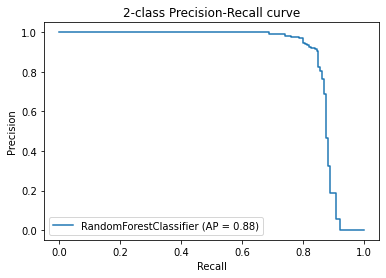

In [55]:
precsion_plot_curve(pred,rfc)